In [7]:
# 基本套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# 資料前處理
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 演算法
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# 評估指標
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [8]:
# 載入資料集 
df = pd.read_csv('../Titanic_demo_1.csv')
df[:5]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,no
1,1,female,38.0,1,0,71.2833,C,yes
2,3,female,26.0,0,0,7.9250,S,yes
3,1,female,35.0,1,0,53.1000,S,yes
4,3,male,35.0,0,0,8.0500,S,no


# 1. 快速資料導覽

In [9]:
# 1.1 檢查資料類型和是否有遺漏值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1001 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Survived  1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


In [10]:
# 修正前的描述性統計
# 1.2 預設情況下使用 describe 函數時，pandas 會自動選擇數字型態資料進行運算
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1001.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,30.147852,0.498854,0.385027,33.295479
std,0.837836,14.179637,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
# Change data type
# Pclass 代表類別，因此需要轉換為正確的資料類型。
df[['Pclass']]=df[['Pclass']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   object 
 1   Sex       1309 non-null   object 
 2   Age       1001 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Survived  1309 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 81.9+ KB


In [12]:
# 1.2 修正後的描述性統計
df.describe()

,Age,SibSp,Parch,Fare
count,1001.000000,1309.000000,1309.000000,1308.000000
mean,30.147852,0.498854,0.385027,33.295479
std,14.179637,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


In [13]:
# 1.3 新增 include='all' 以選取所有欄位
df.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,1309,1309,1001.000000,1309.000000,1309.000000,1308.000000,1309,1309
unique,3,2,NaN,NaN,NaN,NaN,3,2
top,3,male,NaN,NaN,NaN,NaN,S,no
freq,709,843,NaN,NaN,NaN,NaN,914,821
mean,NaN,NaN,30.147852,0.498854,0.385027,33.295479,NaN,NaN
std,NaN,NaN,14.179637,1.041658,0.865560,51.758668,NaN,NaN
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,21.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,NaN,NaN,39.000000,1.000000,0.000000,31.275000,NaN,NaN


In [14]:
# 1.4 使用 value_counts 函數統計類別的次數
print(df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Survived']].value_counts(sort=True))

Pclass
3         709
1         323
2         277
Name: count, dtype: int64
+-----------------------+
Sex   
male      843
female    466
Name: count, dtype: int64
+-----------------------+
Embarked
S           914
C           271
Q           124
Name: count, dtype: int64
+-----------------------+
Survived
no          821
yes         488
Name: count, dtype: int64


# 2. 資料前處理

In [15]:
# 2.1 刪除遺失值 (missing value)        
new_df=df.dropna(axis=0, how='any')
new_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,no
1,1,female,38.0,1,0,71.2833,C,yes
2,3,female,26.0,0,0,7.9250,S,yes
3,1,female,35.0,1,0,53.1000,S,yes
4,3,male,35.0,0,0,8.0500,S,no
...,...,...,...,...,...,...,...,...
1298,1,male,50.0,1,1,211.5000,C,yes
1300,3,female,3.0,1,1,13.7750,S,yes
1302,1,female,37.0,1,0,90.0000,Q,yes
1303,3,female,28.0,0,0,7.7750,S,no


In [16]:
# 描述性統計
new_df[['Age','SibSp','Parch','Fare']].describe()

,Age,SibSp,Parch,Fare
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,30.147852,0.503497,0.415584,37.305257
std,14.179637,0.893442,0.842091,56.336078
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,8.050000
50%,28.000000,0.000000,0.000000,15.900000
75%,39.000000,1.000000,1.000000,37.004200
max,80.000000,5.000000,6.000000,512.329200


In [17]:
# 描述性統計
print(new_df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Survived']].value_counts(sort=True))

Pclass
3         468
1         280
2         253
Name: count, dtype: int64
+-----------------------+
Sex   
male      621
female    380
Name: count, dtype: int64
+-----------------------+
Embarked
S           756
C           199
Q            46
Name: count, dtype: int64
+-----------------------+
Survived
no          605
yes         396
Name: count, dtype: int64


In [18]:
# 2.2 使用 unique 函數檢查類別標籤
print('Pclass',new_df['Pclass'].unique())
print('Sex',new_df['Sex'].unique())
print('Embarked',new_df['Embarked'].unique())
print('Survived',new_df['Survived'].unique())

Pclass ['3' '1' '2']
Sex ['male' 'female']
Embarked ['S' 'C' 'Q']
Survived ['no' 'yes']


In [19]:
# 2.3 使用 pd.get_dummies 函數轉換成 one-hot-encoding
dummied_new_df=pd.get_dummies(new_df,columns=['Pclass','Sex','Embarked','Survived'])
dummied_new_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True,True,False
1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False,False,True
2,26.0,0,0,7.9250,False,False,True,True,False,False,False,True,False,True
3,35.0,1,0,53.1000,True,False,False,True,False,False,False,True,False,True
4,35.0,0,0,8.0500,False,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,50.0,1,1,211.5000,True,False,False,False,True,True,False,False,False,True
1300,3.0,1,1,13.7750,False,False,True,True,False,False,False,True,False,True
1302,37.0,1,0,90.0000,True,False,False,True,False,False,True,False,False,True
1303,28.0,0,0,7.7750,False,False,True,True,False,False,False,True,True,False


In [20]:
# 將處理完的資料存成新的 .csv 檔案
dummied_new_df.to_csv('Titanic_demo_deleteNA.csv',index=False, header=True)
print('Export complete...')

Export complete...


# 3. 設定目標變數（Y）和自變數（X）

In [21]:
# 3.1 快速回顧
dummied_new_df.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True,True,False
1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False,False,True
2,26.0,0,0,7.9250,False,False,True,True,False,False,False,True,False,True
3,35.0,1,0,53.1000,True,False,False,True,False,False,False,True,False,True
4,35.0,0,0,8.0500,False,False,True,False,True,False,False,True,True,False


In [22]:
# 3.2 設定自變數 x
x=dummied_new_df.drop(['Survived_no','Survived_yes'],axis=1).copy()
x

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,35.0,1,0,53.1000,True,False,False,True,False,False,False,True
4,35.0,0,0,8.0500,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,50.0,1,1,211.5000,True,False,False,False,True,True,False,False
1300,3.0,1,1,13.7750,False,False,True,True,False,False,False,True
1302,37.0,1,0,90.0000,True,False,False,True,False,False,True,False
1303,28.0,0,0,7.7750,False,False,True,True,False,False,False,True


In [23]:
# 3.3 設定目標變數 y
y=dummied_new_df['Survived_yes'].copy()
y

0       False
1        True
2        True
3        True
4       False
        ...  
1298     True
1300     True
1302     True
1303    False
1305    False
Name: Survived_yes, Length: 1001, dtype: bool

In [24]:
# 3.4 將資料分成訓練集及測試集
# 分割成 80% 訓練資料 & 20% 測試資料
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print('y_train:',Counter(y_train))
print('------------------------------------')
print('y_test :',Counter(y_test))

y_train: Counter({False: 483, True: 317})
------------------------------------
y_test : Counter({False: 122, True: 79})


# 4. 模型訓練

In [25]:
# 4.1 決策樹模型
model=DecisionTreeClassifier(criterion='gini',max_depth=None,max_leaf_nodes=None,min_samples_leaf=1,random_state=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=4)

In [26]:
# 4.2 訓練結果
# Training result
training_prediction=model.predict(x_train)
training_acc=accuracy_score(y_train,training_prediction)    # Accuracy
training_f1s=f1_score(y_train,training_prediction,pos_label=1)  # f1 score
training_pre=precision_score(y_train,training_prediction,pos_label=1)   # precision
training_sen=sensitivity_score(y_train,training_prediction,pos_label=1) #sensitivity
training_spe=specificity_score(y_train,training_prediction,pos_label=1) #specificity
training_cm=confusion_matrix(y_train,training_prediction)   #confusion matrix

# Testing result
testing_prediction=model.predict(x_test)
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)

# print result
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Training result:
Training ACC: 97.88
Training f1s: 97.24
Training pre: 100.0
Training sen: 94.64
Training spe: 100.0

Training confusion matrix:
[[483   0]
 [ 17 300]]
+-----------------------------------------+
Testing result:
Testing ACC: 70.15
Testing f1s: 59.46
Testing pre: 63.77
Testing sen: 55.7
Testing spe: 79.51

Testing confusion matrix:
[[97 25]
 [35 44]]


In [27]:
# 4.3 在訓練資料上執行五次交叉驗證
CV5F_acc = cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')
print('Each fold ACC:',CV5F_acc)
print('Average ACC:',round((np.mean(CV5F_acc))*100,2),'+/-',round((np.std(CV5F_acc))*100,2))

Each fold ACC: [0.68125 0.70625 0.65625 0.6625  0.675  ]
Average ACC: 67.63 +/- 1.74


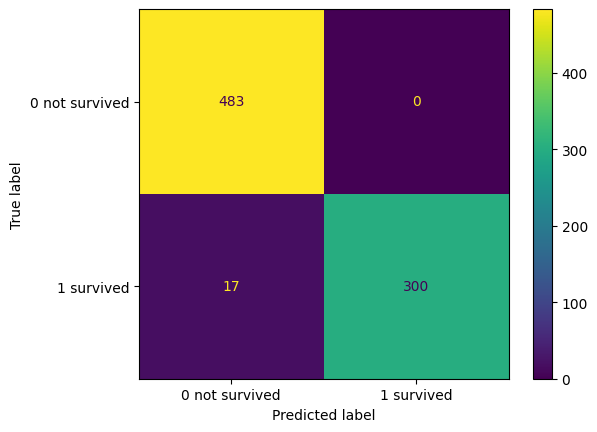

In [28]:
# 4.4 視覺化混淆矩陣
# 4.4.1 Training confusion matrix
ConfusionMatrixDisplay(training_cm, display_labels=["0 not survived","1 survived"]).plot()

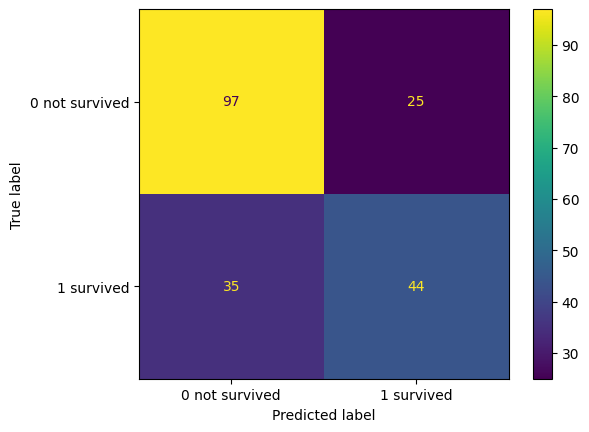

In [29]:
# 4.4.2 Testing confusion matrix
ConfusionMatrixDisplay(testing_cm, display_labels=["0 not survived","1 survived"]).plot()

# 5. 超參數調參

In [30]:
# 5.1 Split the data (split into 80% training data & 20% testing data) (lock seed) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

# 5.2 手動調參
model_cart=DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=10,min_samples_leaf=1,random_state=4)
model_cart.fit(x_train,y_train)
CV5F_cart_acc=cross_val_score(model_cart,x_train,y_train,cv=5,scoring='accuracy')

# 5.3 print reault
print('Training result')
print('Each fold ACC:',CV5F_cart_acc)
print('Average ACC:',round((np.mean(CV5F_cart_acc))*100,2),'+/-',round((np.std(CV5F_cart_acc))*100,2))
print('Depth: ',model_cart.get_depth())
print('Leaves:',model_cart.get_n_leaves())

Training result
Each fold ACC: [0.75    0.825   0.7875  0.75625 0.7875 ]
Average ACC: 78.12 +/- 2.68
Depth:  4
Leaves: 10


Testing ACC: 75.12
Testing f1s: 67.95
Testing pre: 68.83
Testing sen: 67.09
Testing spe: 80.33


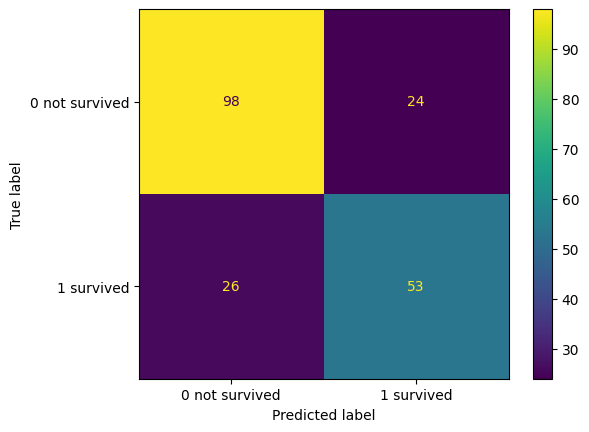

In [31]:
# 5.4 用測試及評估模型好壞
final_model_testing_prediction=model_cart.predict(x_test)
final_model_testing_acc=accuracy_score(y_test,final_model_testing_prediction)
final_model_testing_f1s=f1_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_pre=precision_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_sen=sensitivity_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_spe=specificity_score(y_test,final_model_testing_prediction,pos_label=1)

print('Testing ACC:',round(final_model_testing_acc*100,2))
print('Testing f1s:',round(final_model_testing_f1s*100,2))
print('Testing pre:',round(final_model_testing_pre*100,2))
print('Testing sen:',round(final_model_testing_sen*100,2))
print('Testing spe:',round(final_model_testing_spe*100,2))
final_model_testing_cm = confusion_matrix(y_test,final_model_testing_prediction)
ConfusionMatrixDisplay(final_model_testing_cm, display_labels=["0 not survived","1 survived"]).plot()

# 6. 視覺化決策樹

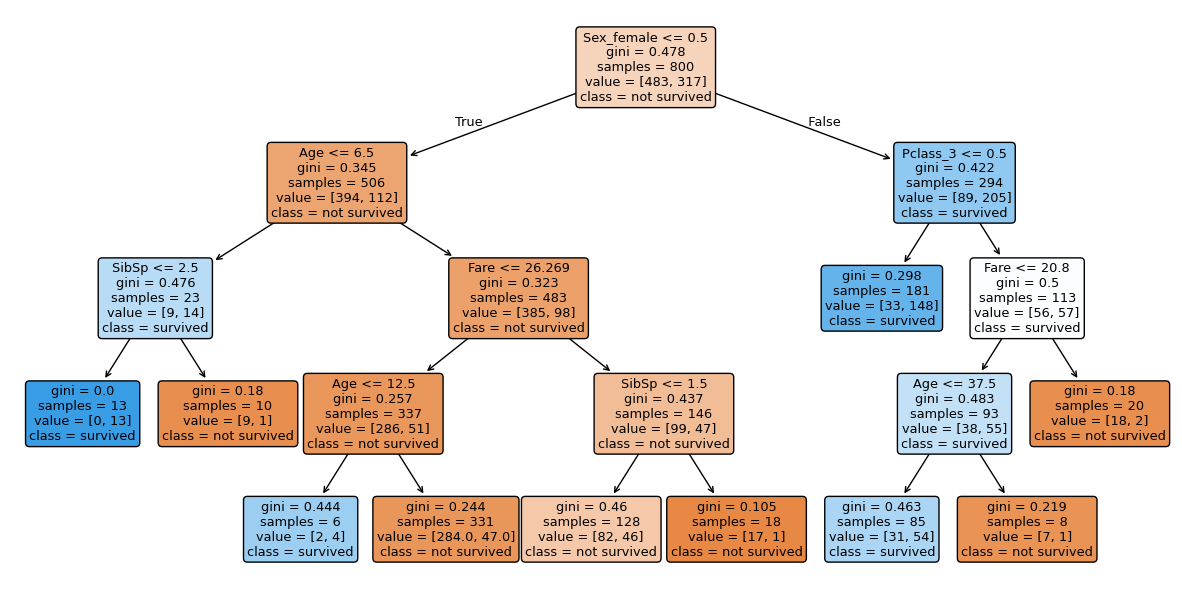

In [32]:
plt.figure(figsize=(15,7.5))
tree.plot_tree(model_cart,filled=True,rounded=True,class_names=["not survived","survived"],feature_names=x.columns);